In [1]:
import numpy as np
from utils_rnn import *

In [2]:
# Data cleaning

# combined_names.txt contains all the Nepali names
data = open('combined_names.txt', 'r').read()
data= data.lower()
characters = list(set(data))
characters = sorted(characters)

data_size, vocab_size = len(data), len(characters)
print('%d total characters & %d unique characters.' % (data_size, vocab_size))



59587 total characters & 27 unique characters.


In [3]:
# Adding indexes -- > characters and reverse
char_to_idx = { ch:i for i,ch in enumerate(characters) }
idx_to_char = { i:ch for i,ch in enumerate(characters) }

## Function for sampling new names

In [4]:
def sample(parameters, char_to_idx):
    
    
    Waa, Wax, Wya, by, b = parameters['Waa'], parameters['Wax'], parameters['Wya'], parameters['by'], parameters['b']
    vocab_size = by.shape[0]
    n_a = Waa.shape[1]
    x = np.zeros((len(char_to_idx),1))
    a_prev = np.zeros((n_a,1))
        # Create an empty list of indices, this is the list which will contain the list of indices of the characters to generate (≈1 line)
    indices = []
    # idx is the index of the one-hot vector x that is set to 1
    # All other positions in x are zero.
    # We will initialize idx to -1
    idx = -1 
    counter = 0
    newline_character = char_to_idx['\n']
    while (idx != newline_character and counter != 15) : 
        a = np.tanh(np.dot(Wax,x) + np.dot(Waa,a_prev) + b)
        z = np.dot(Wya,a) + by
        y = softmax(z)
        # Ssampling the indices from the probability distribution of y
        idx = np.random.choice(range(len(y)), p = y.ravel())
        indices.append(idx)
        
        # X[idx] = 1 because X will be passed to the next timestep as Y<t>
        x = np.zeros((vocab_size,1))
        x[idx] = 1
        a_prev = a
        if (counter == 15):
            indices.append(char_to_idx['\n'])
    
    return indices

In [22]:
# Defining a model
def model(data, filename, idx_to_char, char_to_idx, num_iter = 35000, n_a = 50, nepali_name = 10, vocab_size=27):
    
    n_x, n_y = vocab_size, vocab_size
    loss = -np.log(1.0/vocab_size)*nepali_name
    loss_points = []
    generated_name_list =[]
    
    parameters = initialize_parameters(n_a, n_x, n_y)
    with open(filename) as f:
        training_examples = f.readlines()
    training_examples = [x.lower().strip() for x in training_examples]
    # Initialize the hidden state 
    a_prev = np.zeros((n_a, 1))
    np.random.shuffle(training_examples)
    
    for j in range(num_iter):
        # Mod ie. % returns back to index 0 once we reach end of the examples
        idx = j % len(training_examples)
        # Get an example from idx 
        single_training_example = training_examples[idx]
        # Get all the characters from the single training example
        single_training_character = [char for char in single_training_example]
        # Get the indexes of the characters in the single training example
        single_example_idx = [char_to_idx[ch] for ch in single_training_character]
        # None prepended to set the input vector to 0 vector
        X = [None] + single_example_idx
        idx_newline = char_to_idx["\n"]
        Y = X[1:] + [idx_newline]
        
        curr_loss, gradients, a_prev = optimize(X,Y,a_prev,parameters,learning_rate=0.01)
        loss = smooth(loss, curr_loss)
        
        if j % 2000 == 0:
            
            print('Iteration: %d, Loss: %f' % (j, loss) + '\n')
            loss_points.append(loss)
            
            for name in range(nepali_name):
                
                # Sample indices and print them
                sampled_indices = sample(parameters, char_to_idx)
                generated_name_list.append(print_sample(sampled_indices, idx_to_char))
      
            print('\n')
        
    return loss_points, generated_name_list

        

In [23]:
file_name = "combined_names.txt"
model_loss, generated_name = model(data,file_name,idx_to_char, char_to_idx, num_iter=320000)

Iteration: 0, Loss: 32.945184

Vgpjlvde
J
Kxzbufnvmnkvjviqiqtvcijqmextpulbajxjkodwgqvhkgbyaysdvjrshnyjeyguezw
Lpjsyhhalyj
Xa

Nrlfscbuqncrteyxjrbacgtghcpp
Eurdzg
Vqciuddhh
Vglbz


Iteration: 2000, Loss: 21.674202


Dlraessirenant
Er
Danasujotp

Di
Taakinsayomanhiban
R
Tphie
Ushasashamircridgshbeqeshan


Iteration: 4000, Loss: 18.445728

Bamijabhanasamimodishu
Raraniyarolakhaldabun
Punila
Ekt
Shibtamunx
Ta
Fadakshil
Ujira
Hasha
Rominoshhedhirramuska


Iteration: 6000, Loss: 17.596099

Aridha
Arodlenyi
Sokovi
Emesi
R
Ribdimsh
Obava
Shabida
Ajerkwni
Pyobiro


Iteration: 8000, Loss: 17.052987

Ibi
Pusad
Ranakdendra
Akgi
Sheet
Richesha
Sageeshsa
Bishi
Pit
Idgushanta


Iteration: 10000, Loss: 16.607967

Shpa
Chandrry
Ranvi
Busam
Sjopraprakhan
Tusam
Ratandrishina
Eoday
Sobipena
Ramba


Iteration: 12000, Loss: 16.239223

So
Reshyal
Aesasha
Eel
Aadhaa
Binine
Oek
Sabuna
Sukarant
Bikubhana


Iteration: 14000, Loss: 16.081384

Sumal
Ashem
Peeza
Bimash
Aranak
Chadhi
Ajtin
Bhana
Meetshin
Anit


Iter

Iteration: 148000, Loss: 15.290607

Ranika
Aarajang
Usura
Jewano
Aasiy
Aashchar
Pangitada
Junshanw
Umyal
Soes


Iteration: 150000, Loss: 15.244997

Vartanchda
Anarsha
Almalal
Anshehaban
Viranga
Bprizel
Shimana
Araj
Pratendrajasam
Jeali


Iteration: 152000, Loss: 15.332107

Anrish
Enaswer
An
Runal
Rvajina
Eetalt
Bikina
Aili
Myat
Rani


Iteration: 154000, Loss: 15.327888

Brijesh
Rima
Darukoya
Man
Biswajudap
Bipeasheh
Aasheleek
Sokayan
Ukhdeeshlaa
Mudash


Iteration: 156000, Loss: 15.297226

Jupesh
Sutparh
Mahis
Iridis
Ranjew
Junda
Raghishar
Aasmalth
Meni
Keshwohhal


Iteration: 158000, Loss: 15.244905

Rnatii
Urmesya
Enesba
Abhidyu
Rujansa
Jilea
Ushriban
Cefwal
Cadarman
Ashan


Iteration: 160000, Loss: 15.322017

Dishit
Bikritti
Gurjal
Biju
Uramanti
Awhitendit
Achan
Aapantaav
Srgeen
Rishit


Iteration: 162000, Loss: 15.324701

Roolesh
Ahadap
Sumana
Aural
Slisu
Heepati
Uhi
Jukeya
Aabhad
Smanash


Iteration: 164000, Loss: 15.271274

Huragee
Ghala
Virina
Eulad
Auramayakinda
Aroj
Vishyarshu

Iteration: 296000, Loss: 15.223631

Krilakh
Mishrita
Uhiv
Etanandhara
Birin
Uban
Gunkaha
Ikdan
Ruchanta
Aalir


Iteration: 298000, Loss: 15.095909

Ouk
Ujan
Outsigrid
Aaakshy
Chudesh
Pattila
Uhek
Shkrita
Alos
Hivinendra


Iteration: 300000, Loss: 15.246812

Utiv
Aorojamchhri
Hreejk
Hepajigyin
Arshi
Reeeeljsh
Gyanund
Againa
Debaj
Amala


Iteration: 302000, Loss: 15.138795

Geehup
Sadeev
Ripon
Sndey
Rirtet
Arpesh
Rbishas
Jyarna
Ahkraghanana
Jeechat


Iteration: 304000, Loss: 15.283723

Nilant
Rangor
Rgumeshwor
Echhangha
Munind
Mailambar
Gabish
Prisha
Uevanand
Bibachhar


Iteration: 306000, Loss: 15.080416

Yavil
Sudila
Janrishyo
Bryeida
Diphami
Aie
Shyatiran
Ramevakant
Parat
Mankar


Iteration: 308000, Loss: 15.226642

Hadurak
Maritu
Rulpi
Apeepjat
Mist
Jagoshshg
Aspen
Ramchanka
Bivel
Shameemo


Iteration: 310000, Loss: 15.078121

Canja
Semidra
Binan
Uram
Ushik
Maresh
Sonsan
Ushemh
Girlik
Shttim


Iteration: 312000, Loss: 15.266882

Bramen
Taimeshwral
Lonal
Yujau
Ayojan
Sukaram
Usbichhen

In [25]:
import matplotlib.pyplot as plt
num_iteration = list(range(0, len(model_loss)))

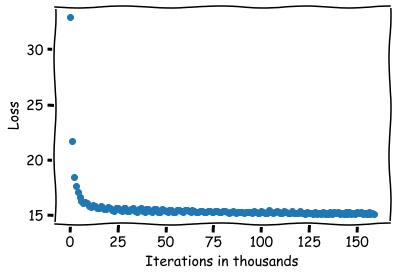

In [37]:
plt.xlabel("Iterations in thousands")
plt.ylabel("Loss")
plt.scatter(num_iteration,model_loss)


In [35]:
len(model_loss)

160

In [38]:
import pandas as pd

In [42]:
generated_names_df=pd.DataFrame(generated_name, columns=["Generated Names"]) 
generated_names_df = generated_names_df.replace('\n','', regex=True)

In [44]:
generated_names_df.to_csv('generated_names')